In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

# Softmax Regression 

## Problem Statement

- You are working as a data scientist in a global finance company. 
- Over the years, the company has collected basic bank details and gathered a lot of credit-related information. 
- The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

## Your Task

### Given a person’s credit-related information, build a machine learning model that can classify the credit score.


## Data Description

- Age: Represents the age of the person
- Annual_Income: Represents the annual income of the person
- Monthly_Inhand_Salary: Represents the monthly base salary of a person
- Num_Bank_Accounts:Represents the number of bank accounts a person holds
- Num_Credit_Card: Represents the number of other credit cards held by a person
- Interest_Rate: Represents the interest rate on credit card
- Num_of_Loan: Represents the number of loans taken from the bank
- Delay_from_due_date: Represents the average number of days delayed from the payment date
- Num_of_Delayed_Payment: Represents the average number of payments delayed by a person
- Changed_Credit_Limit: Represents the percentage change in credit card limit
- Num_Credit_Inquiries: Represents the number of credit card inquiries
- Credit_Mix: Represents the classification of the mix of credits
- Outstanding_Debt: Represents the remaining debt to be paid (in USD)
- Credit_Utilization_Ratio: Represents the utilization ratio of credit card
- Credit_History_Age: Represents the age of credit history of the person
- Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person
- Total_EMI_per_month: Represents the monthly EMI payments (in USD)
- Amount_invested_monthly: Represents the monthly amount invested by the customer (in USD)
- Monthly_Balance: Represents the monthly balance amount of the customer (in USD)
- Credit_Score: Represents the bracket of credit score (Poor, Standard, Good)

## Data Source

https://www.kaggle.com/datasets/sudhanshu2198/processed-data-credit-score

## Data Exploration

### Read the Score.csv data.

In [2]:
df = pd.read_csv('Score.csv')

In [3]:
# Set option to display all columns 
pd.set_option('display.max_columns',None)
df.head()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,Payment_Behaviour,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
0,3.0,7.0,4.0,26.822620,265.0,No,80.415295,312.494089,Good,Good,High_spent_Medium_value_payments,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
1,3.0,7.0,4.0,31.944960,265.0,No,118.280222,284.629162,Good,Good,High_spent_Medium_value_payments,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
2,3.0,7.0,4.0,28.609352,267.0,No,81.699521,331.209863,Good,Good,High_spent_Medium_value_payments,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
3,5.0,4.0,4.0,31.377862,268.0,No,199.458074,223.451310,Good,Good,High_spent_Medium_value_payments,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
4,6.0,4.0,4.0,24.797347,269.0,No,41.420153,341.489231,Good,Good,High_spent_Medium_value_payments,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99960 entries, 0 to 99959
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Delay_from_due_date       99960 non-null  float64
 1   Num_of_Delayed_Payment    99960 non-null  float64
 2   Num_Credit_Inquiries      99960 non-null  float64
 3   Credit_Utilization_Ratio  99960 non-null  float64
 4   Credit_History_Age        99960 non-null  float64
 5   Payment_of_Min_Amount     99960 non-null  object 
 6   Amount_invested_monthly   99960 non-null  float64
 7   Monthly_Balance           99960 non-null  float64
 8   Credit_Score              99960 non-null  object 
 9   Credit_Mix                99960 non-null  object 
 10  Payment_Behaviour         99960 non-null  object 
 11  Age                       99960 non-null  float64
 12  Annual_Income             99960 non-null  float64
 13  Num_Bank_Accounts         99960 non-null  float64
 14  Num_Cr

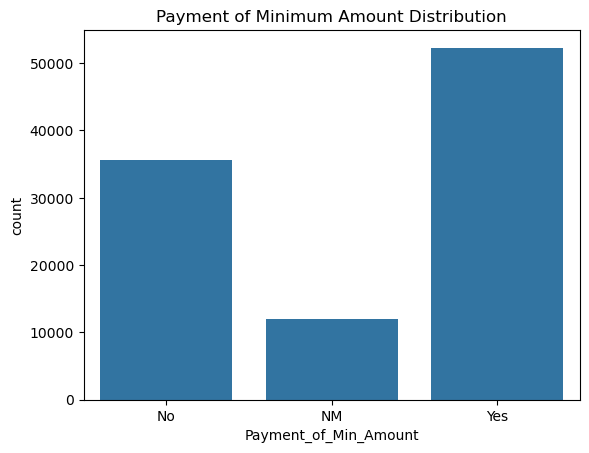

In [5]:
sns.countplot(data=df,x='Payment_of_Min_Amount')
plt.title('Payment of Minimum Amount Distribution')
plt.show()

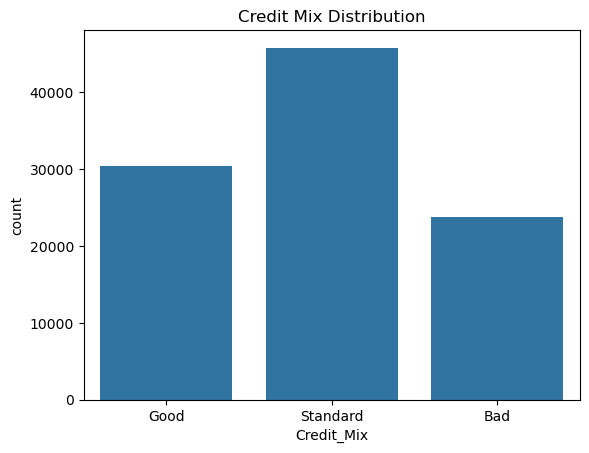

In [6]:
sns.countplot(data=df,x='Credit_Mix')
plt.title('Credit Mix Distribution')
plt.show()

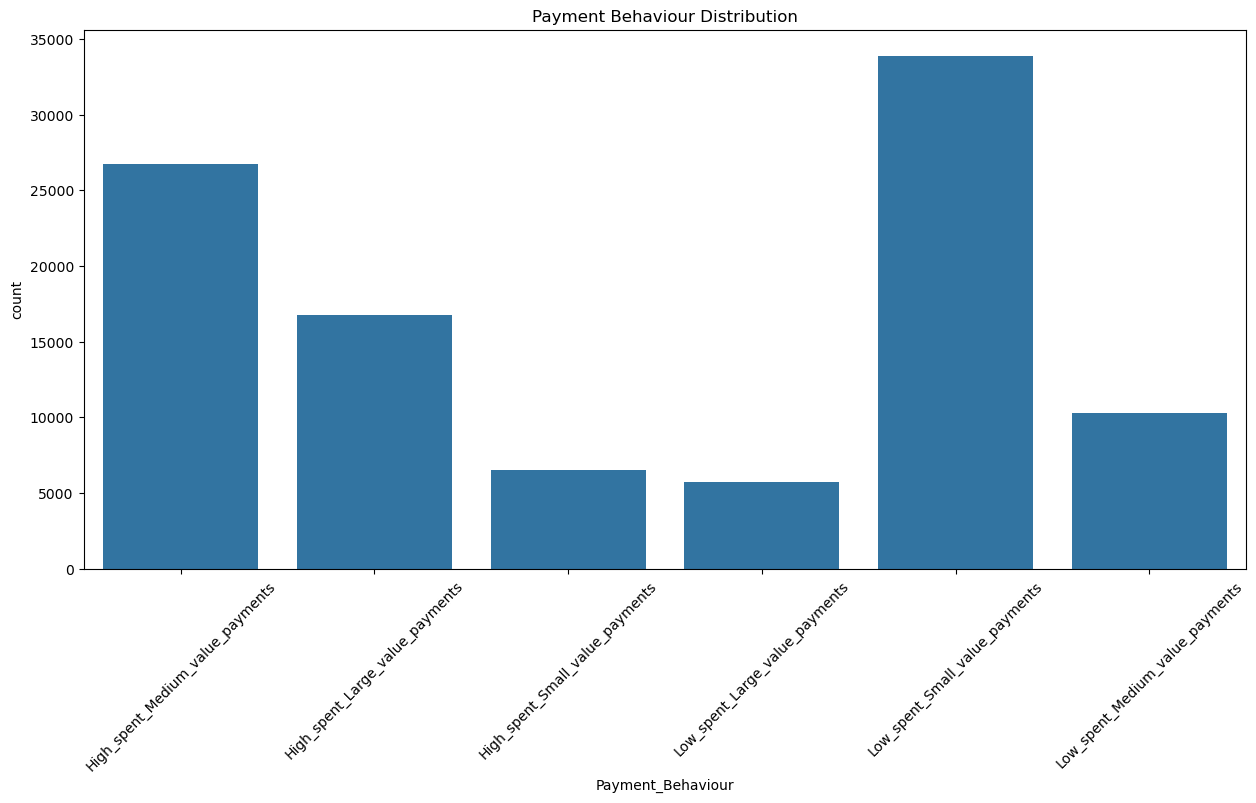

In [7]:
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='Payment_Behaviour')
plt.title('Payment Behaviour Distribution')
plt.xticks(rotation=45)
plt.show()

In [8]:
df.describe()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
count,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000
mean,21.095718,13.336345,5.774570,32.284544,221.122819,193.665219,403.445100,33.269228,50498.704153,5.368868,5.532853,14.535174,3.533974,4196.814288,10.396953,1426.514966,105.565802
std,14.827414,6.269964,3.862224,5.116888,99.696084,194.782737,214.387092,10.762371,38294.243161,2.591668,2.067698,8.741047,2.446156,3186.518163,6.510846,1155.252504,125.820983
min,0.000000,0.000000,0.000000,20.000000,1.000000,0.000000,0.007760,14.000000,7005.930000,0.000000,0.000000,1.000000,0.000000,303.645417,0.500000,0.230000,0.000000
25%,10.000000,9.000000,3.000000,28.052051,144.000000,73.708522,270.317007,24.000000,19338.480000,3.000000,4.000000,7.000000,2.000000,1626.594167,5.500000,566.080000,29.054273
50%,18.000000,14.000000,5.000000,32.305470,219.000000,129.342067,337.237873,33.000000,36996.830000,5.000000,5.000000,13.000000,3.000000,3091.386667,9.340000,1166.470000,66.058063
75%,28.000000,18.000000,8.000000,36.496305,302.000000,234.323706,471.904834,42.000000,71681.400000,7.000000,7.000000,20.000000,5.000000,5957.715000,14.680000,1948.200000,145.584994
max,67.000000,28.000000,29.000000,50.000000,404.000000,1977.326102,1602.040519,56.000000,179987.280000,10.000000,11.000000,34.000000,9.000000,15204.633333,29.980000,4998.070000,1779.103254


## Exercise 1: Use Softmax Regression for Numeric Predictors Only

### Extract X and y from the data 


### Drop all non numeric features

In [9]:
numeric_cols = df.select_dtypes(include=np.number).columns

In [11]:
X = df[numeric_cols]
y = df['Credit_Score']

### Draw a countplot for the dependent variable y

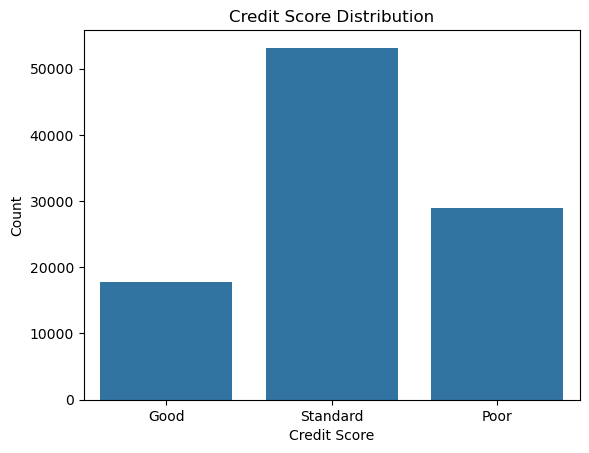

In [13]:
sns.countplot(x=y)
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()

### Train/Test split data with test_size=0.25, random_state=42 

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Create a Softmax regression model using logistic regression (use the default hyperparameters but make max_iter=1000) 

In [ ]:
from sklearn.linear_model import LogisticRegression

softmax_reg = LogisticRegression(max_iter=1000)

### Fit the Softmax regression model to the training data 

In [16]:
softmax_reg.fit(X_train, y_train)

c:\Users\tony\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

### Predict the output for the training and test data 

In [17]:
y_train_pred = softmax_reg.predict(X_train)
y_test_pred = softmax_reg.predict(X_test)

### Evaluate the accuracy of prediction 

In [18]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training prediction accuracy: {train_accuracy}')
print(f'Testing prediction accuracy: {test_accuracy}')

Training prediction accuracy: 0.5985594237695078
Testing prediction accuracy: 0.6002000800320128


## Exercise 2: Use Softmax Regression for Numeric & Non-Numeric Predictors (Features) 

### Extract X and y (Extract all features) and perform Train/Test split with test_size=0.25, random_state=42 

In [20]:
X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Use OneHotEncoder for Non-Numeric Data Preprocessing 

In [21]:
from sklearn.preprocessing import OneHotEncoder
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=np.number).columns

encoder = OneHotEncoder(sparse_output=False)
X_train_cat = encoder.fit_transform(X_train[categorical_cols])
X_test_cat = encoder.transform(X_test[categorical_cols])

### Use StandardScaler for Numeric Data Preprocessing

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[numeric_cols])
X_test_num = scaler.transform(X_test[numeric_cols])

### Concatenate Processed Numeric & Non-Numeric Data 

In [23]:
X_train_processed = np.hstack((X_train_num, X_train_cat))
X_test_processed = np.hstack((X_test_num, X_test_cat))

### Create a Softmax regression model using logistic regression (use the default hyperparameters but make max_iter=1000) 

In [26]:
softmax_reg_full = LogisticRegression(max_iter=1000)

### Fit the Softmax regression model to the processed training data 

In [27]:
softmax_reg_full.fit(X_train_processed, y_train)

LogisticRegression(max_iter=1000)

### Predict the output for the training and test data

In [29]:
y_train_pred_full = softmax_reg_full.predict(X_train_processed)
y_test_pred_full = softmax_reg_full.predict(X_test_processed)

### Evaluate the accuracy of prediction 

In [30]:
train_full_accuracy = accuracy_score(y_train, y_train_pred_full)
test_full_accuracy = accuracy_score(y_test, y_test_pred_full)
print(f'Training prediction accuracy: {train_full_accuracy}')
print(f'Testing prediction accuracy: {test_full_accuracy}')


Training prediction accuracy: 0.6648792850473523
Testing prediction accuracy: 0.6633053221288515


## Repeat Exercise 2 Using Pipeline

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Define Feature Groups

In [43]:
X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']
numeric_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include=['object']).columns

Define the Preprocessor

In [53]:
columnTransformer = ColumnTransformer(
    transformers=[
        ('oneHotEncoder', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), categorical_features),
        ('standardScaler', StandardScaler(), numeric_features),
    ],
    remainder="passthrough")

Create the Pipeline

In [54]:
pipeline = Pipeline(steps=[
    ('columnTransformer', columnTransformer),
    ('classifier', LogisticRegression(max_iter=1000)),
    

])

Split the data

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Fit the Pipeline to the training data.

In [56]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('columnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('oneHotEncoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Payment_of_Min_Amount', 'Credit_Mix', 'Payment_Behaviour'], dtype='object')),
                                                 ('standardScaler',
                                                  StandardScaler(),
                                                  Index(['Delay_from_due_date', 'Num_of_Delayed_Paymen...quiries',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Amount_invested_monthly', 'Monthly_Balance', 'Age', 'Annual_Income',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Monthly_Inhand_Salary', 'Changed_Credit_Limit', 'Outstanding_Debt',
       'Total_EMI_per_month'],
      dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [57]:
y_test_pred_pipeline = pipeline.predict(X_test)
y_train_pred_pipeline = pipeline.predict(X_train)

train_pipeline_accuracy = accuracy_score(y_train, y_train_pred_pipeline)
test_pipeline_accuracy = accuracy_score(y_test, y_test_pred_pipeline)
print(f'Training prediction accuracy: {train_pipeline_accuracy}')
print(f'Testing prediction accuracy: {test_pipeline_accuracy}')

Training prediction accuracy: 0.6648526077097505
Testing prediction accuracy: 0.6633053221288515
